<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

In [1]:
import numpy as np
import pandas as pd
import scipy
from matplotlib import pylab, gridspec, pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

Задание 1
## Простейший kNN
Вам выданы координаты точек и метки классов. Нужно для новой точки предсказать метку класса.

In [6]:
# выгрузите данные в массивы reds и blues из файлов reds.txt и blues.txt
reds = pd.read_csv('./reds.txt', sep=',', header=None)[1].values
blues = pd.read_csv('./blues.txt', sep=',', header=None)[1].values


a = [x for x in range(800)]
red_pairs=[[i, reds[i]] for i in range(800)]
blue_pairs=[[i, blues[i]] for i in range(800)]



Постройте на одном графике точки `reds`и `blues` при помощи `plt.scatter`

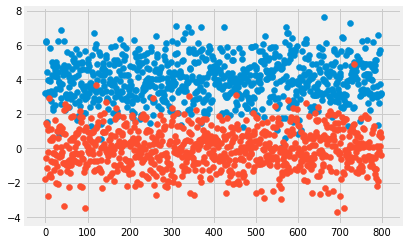

In [4]:
#тут ваш код
plt.scatter(a, reds, label='reds')
plt.scatter(a, blues, label='blues')
plt.show()

 Напишем функцию, которая выбирает для заданного **k** и координат точки наиболее подходящий класс по методу k ближайших соседей

In [10]:
from scipy.spatial import distance

In [24]:
def guess_class(x, y, k):
    ''' Функция отрисовки окрестности точки (x,y) и функция поиска расстояния между точками b,c на плоскости '''
    def draw_points(x,y, color_our_point='orange'):
        plt.figure(figsize=(5,5))
        plt.grid(ls='--')
        plt.scatter(a,reds)
        plt.scatter(a,blues)
        plt.scatter(x,y, c=color_our_point)
        plt.xlim(x-4, x+4)
        plt.ylim(y-4, y+4)
        
    draw_points(x,y)
    
    def distance_2d(b,c):
        ''' Функция подсчета расстояния между двумя точками. Здесь b и с -- координаты точек на плоскости. '''
    
        return ((b[0] - c[0]) ** 2 + (b[1] - c[1]) ** 2) ** 0.5
        
    def calculate_k_distances(class_points):
        ''' Функция подсчета расстояния до k ближайших точек класса class_points '''
        
        #тут ваш код
        
        our_dis = []
        for i in range(len(class_points)):
            our_dis.append(distance_2d([x,y], class_points[i]))
            
        return our_dis
        
    b = np.array(calculate_k_distances(blue_pairs)) # расстояния до ближайших k соседей класса blue
    r = np.array(calculate_k_distances(red_pairs)) # расстояния до ближайших k соседей класса red
    
    
    res_ar = np.concatenate((r,b))
    
    
    counter_red = 0
    counter_blue = 0
    
    road_r = 0
    road_b = 0
    
    res_ar = np.sort(res_ar)
    
    for i in range(k):
        if res_ar[i] in b:
            counter_blue += 1
            road_b += 1/res_ar[i]
        elif res_ar[i] in r:
            road_r += 1/res_ar[i]
            counter_red += 1
            
    if counter_red > counter_blue:
        print('This point belongs red class')
        draw_points(x,y, 'red')
    else:
        print('This point belongs blue class')
        draw_points(x,y, 'blue')
        
    #тут ваш код 
    

This point belongs red class


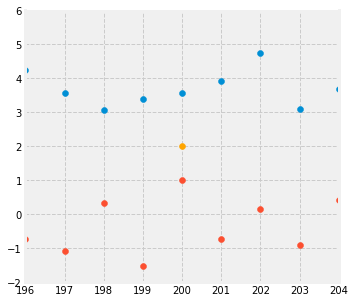

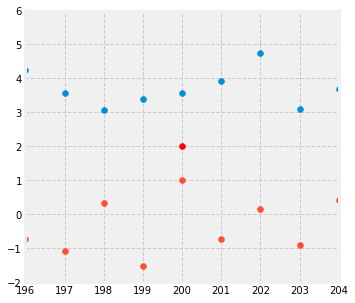

In [26]:
guess_class(200, 2, 3)